<a href="https://colab.research.google.com/github/priya-200/Blog/blob/master/placemets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**:
> This dataset comprises records of students' attributes and their corresponding placement status. It includes information such as the city of residence or educational institution location, the Cumulative Grade Point Average (CGPA), Intelligence Quotient (IQ) scores, and a binary indicator denoting whether the student secured placement in a job or internship. The dataset exhibits a combination of numerical and categorical data, with instances of missing values present within certain entries.WE SHOULD MAKE A MACHINE LEARNING MODEL TO FIND IF A STUDENT WILL GET PLACED OR NOT

**DataSets:**


> This dataset is provided by kaggle at https://www.kaggle.com/datasets/mahad049/college-placement/data






## Import statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Primary analysis of dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data science projects/colege placement/placement-dataset.csv')
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
df.isna().sum()

city         0
cgpa         8
iq           4
placement    0
dtype: int64

In [ ]:
df.shape

(100, 4)

## Analysing the data using graphs

In [ ]:
pd.crosstab(df.city,df.placement)

placement,0,1
city,,
Chicago,18,15
Los Angeles,20,13
New York,16,18


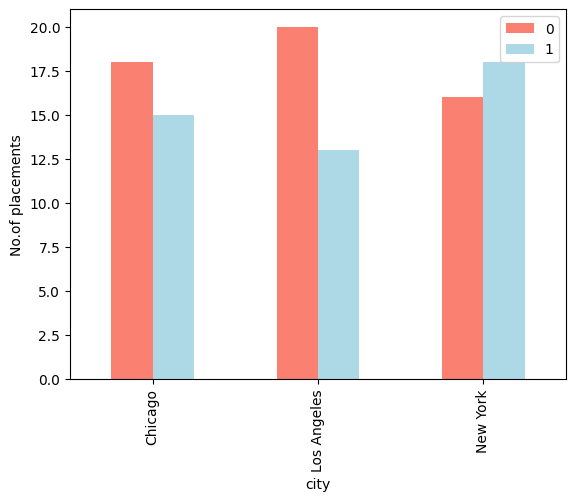

In [ ]:
pd.crosstab(df.city,df.placement).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('city')
plt.ylabel('No.of placements')
plt.legend();

<Axes: ylabel='Frequency'>

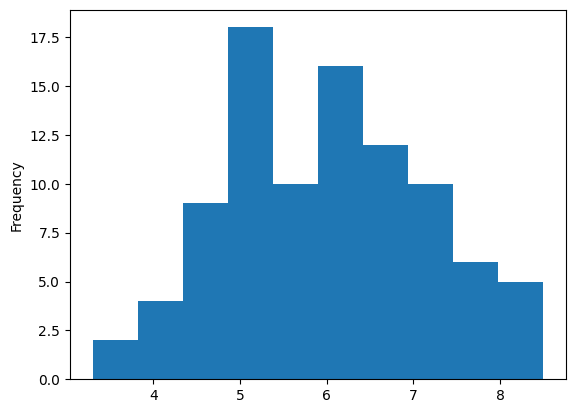

In [ ]:
df.cgpa.plot(kind='hist')

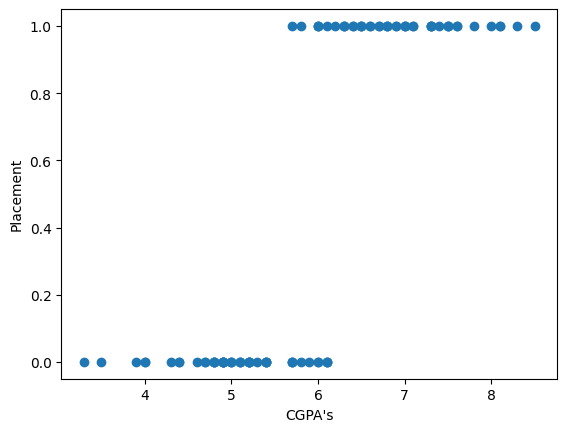

In [ ]:
plt.scatter(x=df.cgpa,y=df.placement)
plt.ylabel('Placement')
plt.xlabel("CGPA's");

In [ ]:
df.columns

Index(['city', 'cgpa', 'iq', 'placement'], dtype='object')

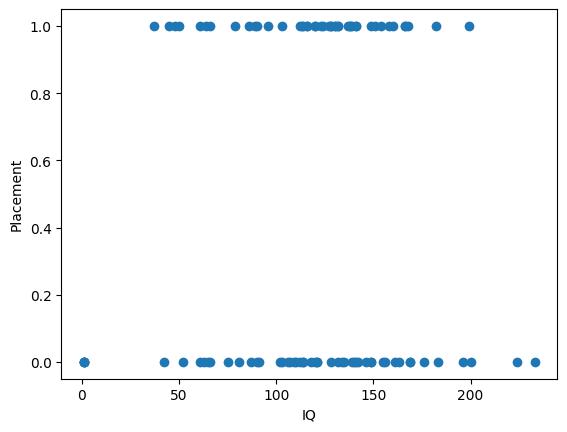

In [ ]:
plt.scatter(df.iq,df.placement)
plt.xlabel('IQ')
plt.ylabel('Placement');

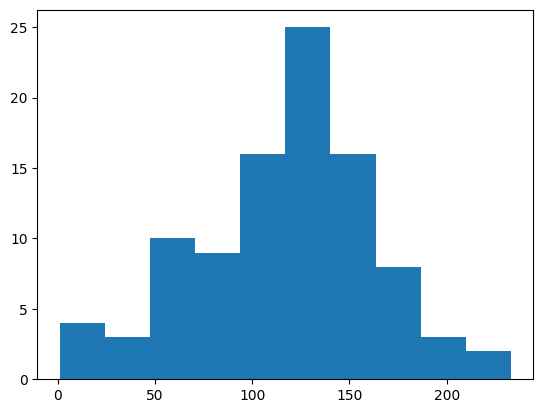

In [ ]:
plt.hist(df.iq);

## Filling the missing values

In [ ]:
for label,content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

cgpa
iq
placement


In [ ]:
for label,content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    df[label+"_is_missing"] = pd.isna(content)
    df[label] = content.fillna(content.mean())

In [ ]:
df.head()

,city,cgpa,iq,placement,cgpa_is_missing,iq_is_missing,placement_is_missing
0,New York,6.800000,123.0,1,False,False,False
1,Los Angeles,5.900000,106.0,0,False,False,False
2,Chicago,5.965217,121.0,0,True,False,False
3,New York,7.400000,132.0,1,False,False,False
4,Los Angeles,5.800000,142.0,0,False,False,False


In [ ]:
df.isna().sum()

city                    0
cgpa                    0
iq                      0
placement               0
cgpa_is_missing         0
iq_is_missing           0
placement_is_missing    0
dtype: int64

In [ ]:
df.city.value_counts()

New York       34
Los Angeles    33
Chicago        33
Name: city, dtype: int64

In [ ]:
for label,content in df.items():
  if pd.api.types.is_string_dtype(content):
    df[label] = df[label].astype('category').cat.as_ordered()

In [ ]:
for label,content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label] = pd.Categorical(content).codes+1

In [ ]:
for label,content in df.items():
  if pd.api.types.is_bool_dtype(content):
    df[label] = content.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  100 non-null    int8   
 1   cgpa                  100 non-null    float64
 2   iq                    100 non-null    float64
 3   placement             100 non-null    int64  
 4   cgpa_is_missing       100 non-null    int64  
 5   iq_is_missing         100 non-null    int64  
 6   placement_is_missing  100 non-null    int64  
dtypes: float64(2), int64(4), int8(1)
memory usage: 4.9 KB


## Building a model

In [ ]:
X = df.drop('placement',axis=1)
y = df.placement

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

In [ ]:
X_train.head()

,city,cgpa,iq,cgpa_is_missing,iq_is_missing,placement_is_missing
48,3,6.6,138.0,0,0,0
99,3,6.2,113.0,0,0,0
84,3,5.7,169.0,0,0,0
25,2,5.0,91.0,0,0,0
76,2,4.9,155.0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
models = {
    "RandomForestClassifier":RandomForestClassifier(),
    "K-nearest nneighbors":KNeighborsClassifier(),
    "LogisticRegression":LogisticRegression(),
    "Support vector machine":SVC(),
    "Naive Bayes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "Perceptron":Perceptron()
}

In [ ]:
scores = {}
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,7))

def calculating_scores(X_train, y_train, X_test, y_test, m=None):
    np.random.seed(42)
    scores = {}
    num_models = len(m)
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for i, (name, model) in enumerate(m.items()):
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        scores[name] = {
            "Accuracy": accuracy_score(y_test, y_preds),
            "F1 score": f1_score(y_test, y_preds),
            "Precision score": precision_score(y_test, y_preds),
            "Recall score": recall_score(y_test, y_preds)
        }
        cm = confusion_matrix(y_test, y_preds)
        row = i // 4
        col = i % 4

        sns.heatmap(pd.DataFrame(cm), annot=True, fmt=".2f", linewidth=0.5, cmap='YlGnBu', ax=axes[row, col], cbar=i == num_models-1, cbar_ax=None if i < num_models-1 else cbar_ax)
        axes[row, col].set_title(f'Confusion Matrix - {name}')
    plt.tight_layout(rect=[0, 0, .9, 1])
    plt.show()

    return scores


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-41-ee168c7ec6b2>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .9, 1])


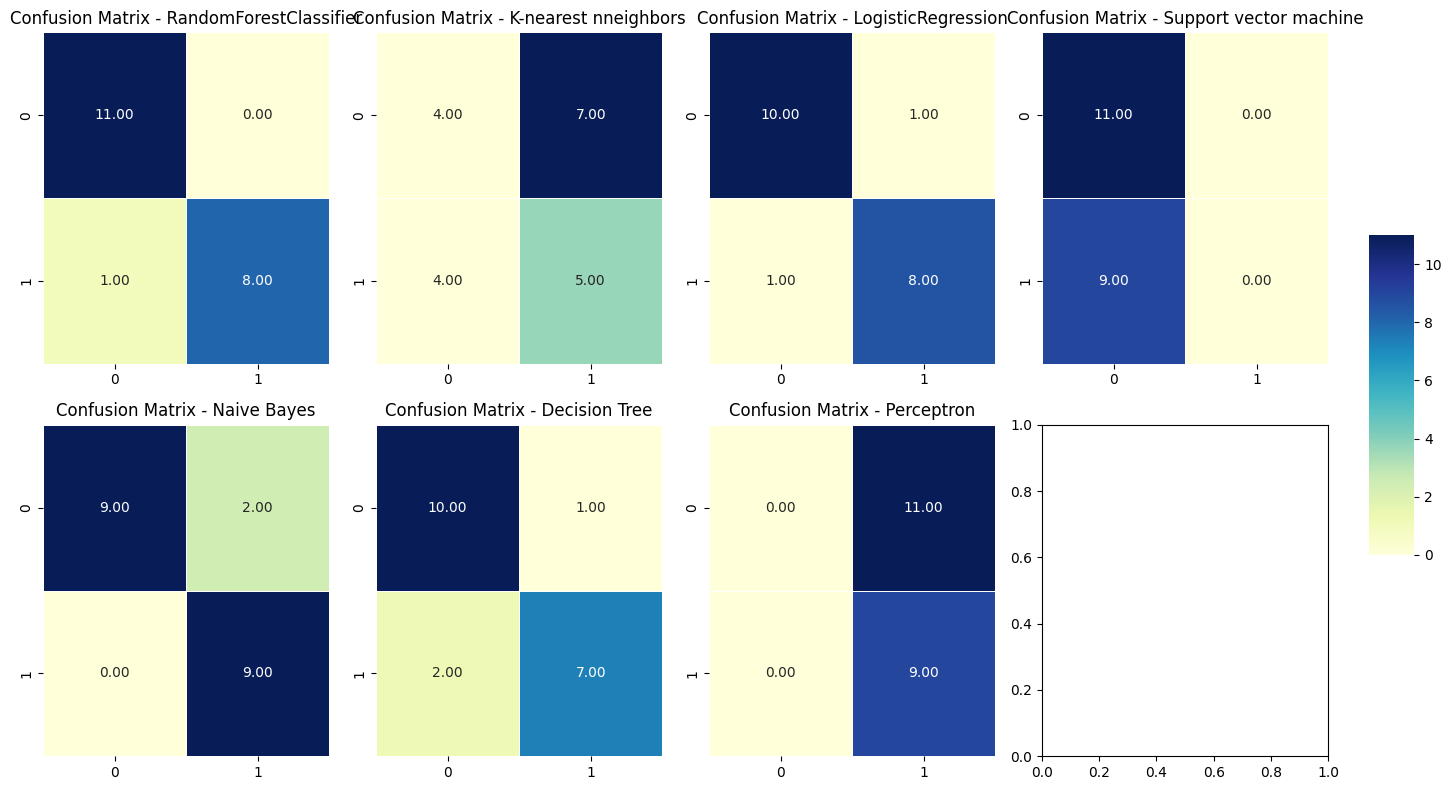

{'RandomForestClassifier': {'Accuracy': 0.95,
  'F1 score': 0.9411764705882353,
  'Precision score': 1.0,
  'Recall score': 0.8888888888888888},
 'K-nearest nneighbors': {'Accuracy': 0.45,
  'F1 score': 0.4761904761904762,
  'Precision score': 0.4166666666666667,
  'Recall score': 0.5555555555555556},
 'LogisticRegression': {'Accuracy': 0.9,
  'F1 score': 0.8888888888888888,
  'Precision score': 0.8888888888888888,
  'Recall score': 0.8888888888888888},
 'Support vector machine': {'Accuracy': 0.55,
  'F1 score': 0.0,
  'Precision score': 0.0,
  'Recall score': 0.0},
 'Naive Bayes': {'Accuracy': 0.9,
  'F1 score': 0.9,
  'Precision score': 0.8181818181818182,
  'Recall score': 1.0},
 'Decision Tree': {'Accuracy': 0.85,
  'F1 score': 0.823529411764706,
  'Precision score': 0.875,
  'Recall score': 0.7777777777777778},
 'Perceptron': {'Accuracy': 0.45,
  'F1 score': 0.6206896551724138,
  'Precision score': 0.45,
  'Recall score': 1.0}}

In [ ]:
model_score = calculating_scores(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, m=models)
model_score

In [ ]:
model_names = model_score.keys()
model_accuracy = [model['Accuracy'] for model in model_score.values()]

In [ ]:
model_accuracy

[0.95, 0.45, 0.9, 0.55, 0.9, 0.85, 0.45]

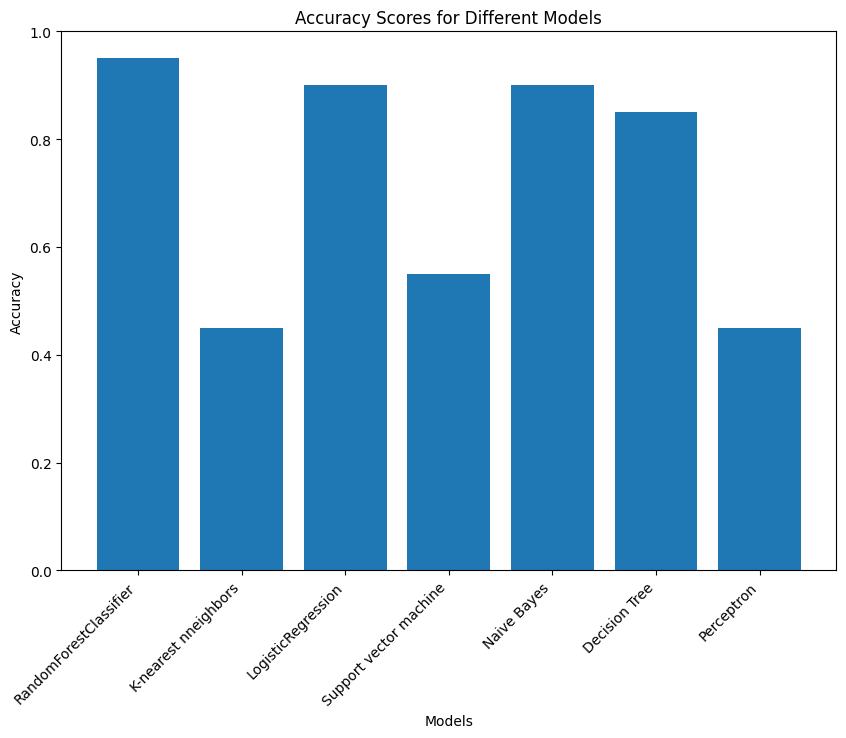

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.bar(model_names,model_accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45,ha='right');